# KNN and decision tree classification
In this lab, we will work with the DonorChoose.org dataset from KDD Cup 14 to predict whether a funding request is exciting or not. Keep your work organized as we will use the same data and problem in the following labs as well. 

## Download the datasets from the KDD website
The first step is to download the dataset from [Kaggle website](http://www.kaggle.com/c/kdd-cup-2014-predicting-excitement-at-donors-choose/data). You can look at the definition of 'is exciting' as well as some explanation of the data fields in the given link. In this lab, we will use Python, Pandas, numpy and scikit-learn.

In [10]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, check the size of the datasets:

In [35]:
# example:
projects  = pd.read_csv('./data/projects.csv')
print(projects.shape[0])
print(projects.columns)

outcomes  = pd.read_csv('./data/outcomes.csv')
print(outcomes.shape[0])
print(outcomes.columns)


664098
Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')
619326
Index(['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_dona

The dataset contains
- projects    :  664098  
- resources  :  3667217
- essays       :  664098
- outcomes  :   619326
- donations  :   3097989



## plotting the data
Plot the exciting projects based on their date. See whether there is any interesting result there.

In [42]:
data = pd.merge(outcomes, projects, on='projectid')

data.date_posted = pd.to_datetime(data.date_posted)

exciting = data[data['is_exciting'] == 't']

In [43]:
len(exciting)

36710

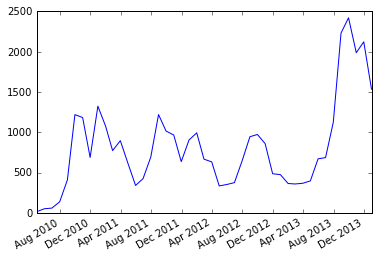

In [51]:
from pandas import TimeGrouper

num_exciting_projects = pd.DataFrame(exciting.groupby('date_posted').size().rename('counts'))

num_projects_month = num_exciting_projects.groupby(TimeGrouper('M')).aggregate(np.sum)

#making figure
fig, ax = pl.subplots(1)
ax.plot(num_projects_month.index, num_projects_month.counts)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# # use a more precise date string for the x axis locations in the
# # toolbar
# import matplotlib.dates as mdates
# ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# plt.title('fig.autofmt_xdate fixes the labels')

             counts
date_posted        
2010-12-31     5099
2011-12-31     9578
2012-12-31     7755
2013-12-31    14278


/usr/local/lib/python3.4/dist-packages/matplotlib/ticker.py:981: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.tseries.converter.PandasAutoDateLocator'>
  str(type(self)))


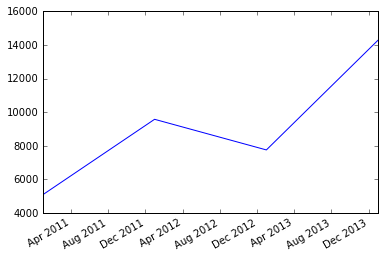

In [59]:
num_projects_year = num_exciting_projects.groupby(TimeGrouper('A')).aggregate(np.sum)
print(num_projects_year)
fig, ax = pl.subplots(1)
ax.plot(num_projects_year.index, num_projects_year.counts)
ax.locator_params(nbins=40, axis='x')
fig.autofmt_xdate()

You will see that there is no exciting projects before 2010-04-14. This can effect the accuracy of prediction. The reason is DonorsChoose.org simply did not keep track of some of the requirements needed to decide 'is_exciting'. How can you avoid this issue in your prediction?

## Load the CSV files into Pandas and preprocess as needed
Let us stick to projects.csv and outcomes.csv for the tasks in this lab session for now. Check whether there are Null instances or other problems in your data  you should take care of.

## Prediction tasks
In this lab we ask you to work on the following two prediction tasks. The first one is a binary classfication and the second one is a multi-class classification problem.

### Task 1
Predict whether a project is exciting by picking the features you chose from the dataset. Feel free to make new features from the existing ones.

### Task 2
Predict the Poverty level of the school. Which feature would you pick from the dataset?

## Choose your features
For each task, choose some of the data fields from projects.csv that you think could be used as useful features for predicting the 'is-exciting' and poverty level outcome.

## Form your train and test set
Separate a portion of your data as train and the other portion as test set to work with. Keep these two sets fixed for all of your experiments and choose them randomly. You can use the following:

In [ ]:
from sklearn.cross_validation import train_test_split

## Train your models and test on your test data

### First step

Train KNN and Decision Tree models with your training set for each task. Choose some initial parameters for your models and see how they perform on the test set for these tasks.

In [ ]:
# You may need to import these:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

## Explore the models you just built

### kNN
For kNN, take a few points and retrieve neirest neighbors for each of them? Do the neighbors make sense? 
Would you change the distance function to get "better" neighbors?

### Decision Trees
For Decision Trees, can you visualize or print out the tree? Try using sklearn.tree.export_graphviz()

## How do these models change as you vary the parameters?

### For kNN, see what happens when:
- you do or do not scale/normalize features
- you vary k from very small to very large
- you vary distance metrics
- you vary distance weighting

### For decision trees, try similar ideas:
- vary pruning and stopping strategies, use the following parameters:
    - min_impurity_split
    - min_samples_split
- vary splitting criteria, use the following parameters:
    - max_depth
    - mean_samples_leaf
    - max_leaf_nodes
    
Check the reference below for description of these parameters

## Operationalizing this search through the parameter space

Can you put all all of these variations in a nested for loop and run all of them and look at the performance of the models?

## References
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

http://scikit-learn.org/stable/modules/tree.html

Different parameters for decision tree:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier